### Manipulation of Trans Proteomic Pipeline (TPP) Comet database search results of *Prochlorococus MED4* LC-MS/MS data using python.

Starting with: 

- Comet output (.xlxs and .csv) of PTM-optimized database searches, sorted by XCorr (descending) and run through XInteract to extract precursor intensities and protein descriptions mapped from the search database.

Ending with:

- Files with stripped (no PTMs or tryptic ends) peptide lists and
- Columns with #'s of each modification in every sequence
- Column with stripped peptide lengths (# amino acids)
- Histogram of sequence lengths
- Bar plots of PTM occurance

### To use:

#### 1. Change the input file name in *IN 4*
#### 2. Change output file name in *IN 6*, *IN 7*, *IN 8*

For technical duplicates, I exported Comet search results as both Excel files and as CSVs into my ETNP 2017 git repo:

Also, when running through XInteract in the TPP, I combined the duplicate injections into a single PepXML file which I exported as an xls file and converted to a csv.

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP


In [2]:
ls

 RAL4_MED2_combine_Comet25_AA_NAAF.csv
 RAL4_MED2_combine_Comet2.5Xcorr_proteins.txt
 RAL4_MED2_combine_Comet3_AA_NAAF.csv
 RAL4_MED2_combine_Comet3Xcorr_proteins.txt
 RAL4_MED2_combined_trypsin_combined_PTMopt_15ppm_Comet.xlsx
 RAL4_MED2_trypsin_1_PTMopt_Comet.csv
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped.csv
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped_peptides_2.5XCorr.txt
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped_peptides.txt
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped_work.ods
 RAL4_MED2_trypsin_1_PTMopt_Comet_unfiltered.csv
 RAL4_MED2_trypsin_1_PTMopt_Comet.xlsx
 RAL4_MED2_trypsin_1_PTMopt_PepProp90.csv
 RAL4_MED2_trypsin_1_PTMopt_PepProp90_stripped.csv
 RAL4_MED2_trypsin_1_PTMopt_PepProp90_stripped_peptides
 RAL4_MED2_trypsin_1_PTMopt_PepProp90.xlsx
 RAL4_MED2_trypsin_2_PTMopt_Comet.csv
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped.csv
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped_peptides_2.5XCorr.txt
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped_peptides.txt
 RAL4_MED2_trypsin_2_PTMopt_

In [3]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [5]:
# formerly, read in the replicates without precursor intensities and protein descriptions:

# read the CSVs of each replicate into a datadrame we name 'comet' using the pandas read_csv function
##comet1 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_1_PTMopt_Comet.csv")
##comet2 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_2_PTMopt_Comet.csv")

##frames = [comet1, comet2]

# concatenate dataframes
## cometdup = pd.concat(frames, sort=False)

# now, reading in the combined csv that contains precursor intensities and protein descriptions
cometdup = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_combined_trypsin_combined_PTMopt_15ppm_Comet.xlsx", index_col='spectrum')

# remove redundant rows
comet = pd.DataFrame.drop_duplicates(cometdup)

print("# redundant Comet peptides in combined dataframe", len(cometdup))
print("# nonredundant Comet peptides in combined dataframe", len(comet))

comet.head()

# redundant Comet peptides in combined dataframe 114593
# nonredundant Comet peptides in combined dataframe 114593


,xcorr,deltacn,expect,peptide,ions,calc_neutral_pep_mass,precursor_intensity,protein,protein_descr
spectrum,,,,,,,,,
022016_RAL4_95_MED2_trypsin_1.37926.37926.2,6.713,0.789,3.740000e-16,K.SKPFNDGFNAATGDYVDMSAAGIVDPAK.V,41/54,2857.3229,5578550.0,PMM1436,| groEL | chaperonin GroEL
022016_RAL4_95_MED2_trypsin_1.31081.31081.2,6.630,0.708,1.080000e-05,K.IDIEDGGIVTIASHDGAAAEEAQK.L,36/46,2409.1660,1448720.0,PMM1191,| pnp | polynucleotide phosphorylase\polyadeny...
022016_RAL4_95_MED2_trypsin_1.32966.32966.2,6.522,0.748,6.380000e-07,K.SKPFNDGFNAATGDYVDM[147.04]SAAGIVDPAK.V,35/54,2873.3178,10052800.0,PMM1436,| groEL | chaperonin GroEL
022016_RAL4_95_MED2_trypsin_1.33045.33045.2,6.521,0.768,2.670000e-13,R.AKNTGVEYAQ[129.04]GLVALGGDDEELAK.E,37/46,2448.2020,3484900.0,PMM0228,| psbO | photosystem II manganese-stabilizing ...
022016_RAL4_95_MED2_trypsin_2.32740.32740.2,6.433,1.000,8.230000e-13,K.SKPFNDGFNAATGDYVDM[147.04]SAAGIVDPAK.V,34/54,2873.3178,10236600.0,PMM1436,| groEL | chaperonin GroEL


The peptide column has the residues before and after the tryptic terminii as well as masses of modified residues (e.g., 160.03 Da for carbamidomethylated cysteine). We want to make new columns with all that information and make a column with only the 'stripped' peptide sequence that's just amino acids - this we can then align against other sequences, for example. 

Modified residues were allowed for:

- fixed carbamodimethylation of cysteine 160.03 C
- varialbe oxidation of methionine: 147.04 M
- variable deamidation of asparagine: 115.03 N
- variable deamidation of glumatine: 129.04 Q
- variable iron cation on lysine: 182.11 K REMOVED!
- variable methylation of lysine: 142.11 K
- variable methylation of arginine: 170.12 R

We'll then write this manipulated dataframe to a new file.

In [7]:
# get rid of rows where the xcorr is unavailable (usually 3 or so)
comet = comet[comet.xcorr != '[unavailable]']

# use str.strip with indexing by str[0] to add a column with the peptide's left terminus
comet['L terminus'] = comet['peptide'].astype(str).str[0]

# use str.strip with indexing by str[-1] to add a column with the peptide's left terminus
comet['R terminus'] = comet['peptide'].str.strip().str[-1]

# use a count function to enumerate the # of A's (alanines) in each peptide
comet['A'] = comet['peptide'].str.count("A")

# use a count function to enumerate the # of C's (cysteines) in each peptide
comet['C'] = comet['peptide'].str.count("C")

# use a count function to enumerate the # of D's (aspartic acids) in each peptide
comet['D'] = comet['peptide'].str.count("D")

# use a count function to enumerate the # of E's (glutamic acids) in each peptide
comet['E'] = comet['peptide'].str.count("E")

# use a count function to enumerate the # of F's (phenylalanines) in each peptide
comet['F'] = comet['peptide'].str.count("F")

# use a count function to enumerate the # of G's (glycines) in each peptide
comet['G'] = comet['peptide'].str.count("G")

# use a count function to enumerate the # of H's (histidines) in each peptide
comet['H'] = comet['peptide'].str.count("H")

# use a count function to enumerate the # of I's (isoleucines) in each peptide
comet['I'] = comet['peptide'].str.count("I")

# use a count function to enumerate the # of K's (lysines) in each peptide
comet['K'] = comet['peptide'].str.count("K")

# use a count function to enumerate the # of L's (leucines) in each peptide
comet['L'] = comet['peptide'].str.count("L")

# use a count function to enumerate the # of M's (methionines) in each peptide
comet['M'] = comet['peptide'].str.count("M")

# use a count function to enumerate the # of N's (asparagines) in each peptide
comet['N'] = comet['peptide'].str.count("N")

# use a count function to enumerate the # of P's ([prolines]) in each peptide
comet['P'] = comet['peptide'].str.count("P")

# use a count function to enumerate the # of Q's (glutamines) in each peptide
comet['Q'] = comet['peptide'].str.count("Q")

# use a count function to enumerate the # of R's (arginines) in each peptide
comet['R'] = comet['peptide'].str.count("R")

# use a count function to enumerate the # of S's (serines) in each peptide
comet['S'] = comet['peptide'].str.count("S")

# use a count function to enumerate the # of T's (threonines) in each peptide
comet['T'] = comet['peptide'].str.count("T")

# use a count function to enumerate the # of V's (valines) in each peptide
comet['V'] = comet['peptide'].str.count("V")

# use a count function to enumerate the # of W's (tryptophans) in each peptide
comet['W'] = comet['peptide'].str.count("W")

# use a count function to enumerate the # of Y's (tyrosines) in each peptide
comet['Y'] = comet['peptide'].str.count("Y")

# use a count function to enumerate the # of carbamidomethylated C's in each peptide
comet['c-carb'] = comet['peptide'].str.count("160.03")

# use a count function to enumerate the # of oxidized M's in each peptide
comet['m-oxid'] = comet['peptide'].str.count("147.04")

# use a count function to enumerate the # of deamidated N's in each peptide
comet['n-deam'] = comet['peptide'].str.count("115.03")

# use a count function to enumerate the # of deamidated Q's in each peptide
comet['q-deam'] = comet['peptide'].str.count("129.04")

# use a count function to enumerate the # of iron adducted K's in each peptide
#comet['k-iron'] = comet['peptide'].str.count("182.11")

# use a count function to enumerate the # of methylated K's in each peptide
comet['k-meth'] = comet['peptide'].str.count("142.11")

# use a count function to enumerate the # of methylated R's in each peptide
comet['r-meth'] = comet['peptide'].str.count("170.12")

# create a column with 'stripped' peptide sequences using strip
comet['stripped peptide'] = comet['peptide'].str[2:].str[:-2].str.replace(r"\[.*\]","")

# add a column with the stripped peptide length (number of AAs)
comet['stripped length'] = comet['stripped peptide'].apply(len)

# total the number of modifications in sequence
comet['ptm-total'] = comet['c-carb'] + comet['m-oxid'] + comet['n-deam'] + comet['q-deam'] + comet['k-iron'] + comet['k-meth'] + comet['r-meth']

# calculate the NAAF numerator for later NAAF normalization
comet['NAAF num.'] = comet['precursor_intensity'] / comet['stripped length']

# write modified dataframe to new txt file, plus 'unfiltered'
comet.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_1_PTMopt_Comet_unfiltered.csv")

# check out the results
comet.head()

/home/millieginty/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,xcorr,deltacn,expect,peptide,ions,calc_neutral_pep_mass,precursor_intensity,protein,protein_descr,L terminus,...,m-oxid,n-deam,q-deam,k-iron,k-meth,r-meth,stripped peptide,stripped length,ptm-total,NAAF num.
spectrum,,,,,,,,,,,,,,,,,,,,,
022016_RAL4_95_MED2_trypsin_1.37926.37926.2,6.713,0.789,3.740000e-16,K.SKPFNDGFNAATGDYVDMSAAGIVDPAK.V,41/54,2857.3229,5578550.0,PMM1436,| groEL | chaperonin GroEL,K,...,0,0,0,0,0,0,SKPFNDGFNAATGDYVDMSAAGIVDPAK,28,0,199233.928571
022016_RAL4_95_MED2_trypsin_1.31081.31081.2,6.630,0.708,1.080000e-05,K.IDIEDGGIVTIASHDGAAAEEAQK.L,36/46,2409.1660,1448720.0,PMM1191,| pnp | polynucleotide phosphorylase\polyadeny...,K,...,0,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,60363.333333
022016_RAL4_95_MED2_trypsin_1.32966.32966.2,6.522,0.748,6.380000e-07,K.SKPFNDGFNAATGDYVDM[147.04]SAAGIVDPAK.V,35/54,2873.3178,10052800.0,PMM1436,| groEL | chaperonin GroEL,K,...,1,0,0,0,0,0,SKPFNDGFNAATGDYVDMSAAGIVDPAK,28,1,359028.571429
022016_RAL4_95_MED2_trypsin_1.33045.33045.2,6.521,0.768,2.670000e-13,R.AKNTGVEYAQ[129.04]GLVALGGDDEELAK.E,37/46,2448.2020,3484900.0,PMM0228,| psbO | photosystem II manganese-stabilizing ...,R,...,0,0,1,0,0,0,AKNTGVEYAQGLVALGGDDEELAK,24,1,145204.166667
022016_RAL4_95_MED2_trypsin_2.32740.32740.2,6.433,1.000,8.230000e-13,K.SKPFNDGFNAATGDYVDM[147.04]SAAGIVDPAK.V,34/54,2873.3178,10236600.0,PMM1436,| groEL | chaperonin GroEL,K,...,1,0,0,0,0,0,SKPFNDGFNAATGDYVDMSAAGIVDPAK,28,1,365592.857143


## Calculating the false discovery rate (% FDR)

### Filtering PSMs > a selected XCorr value and exporting peptides

In [29]:
# Let's separate out the decoy hits from the good ones

cometpmm = comet[~comet['protein'].str.contains("DECOY")]
cometdec = comet[comet['protein'].str.contains("DECOY")]

# how many PSM that are only PMM (proteins in the database)?

print("# real Comet PSMs", len(cometpmm))

# compared to how many PSMs containing decoys?

print("# decoy Comet PSMs", len(cometdec))

# calculate the bulk FDR (all PSMs so let's not beat ourselves up)

r = len(cometpmm)
d = len(cometdec)

FDR = d/r*100

print("False discovery rate (%) = ", FDR)

# real Comet PSMs 78443
# decoy Comet PSMs 36150
False discovery rate (%) =  46.084417985033724


In [34]:
# keep only peptides  >3 XCorr
# need to convert Xcorr column from strings to numeric so we can use loc
comet['xcorr'] = pd.to_numeric(comet['xcorr'])

comet3 = comet.loc[comet['xcorr'] >= 2.17]

# What's the FDR?

# Let's separate out the decoy hits from the good ones

cometpmm3 = comet3[~comet3['protein'].str.contains("DECOY")]
cometdec3 = comet3[comet3['protein'].str.contains("DECOY")]

# how many PSM that are only PMM (proteins in the database)?

print("# real Comet PSMs", len(cometpmm3))

# compared to how many PSMs containing decoys?

print("# decoy Comet PSMs", len(cometdec3))

# calculate the FDR 

r = len(cometpmm3)
d = len(cometdec3)

FDR = d/(d+r)*100

print("False discovery rate = ", FDR)

# real Comet PSMs 19809
# decoy Comet PSMs 19
False discovery rate =  0.09582408714948558


### Exporting peptides from FDR < 0.1% threshold

In [45]:
# keep only peptides where FDR < 0.1% (determined in cell above)
# need to convert Xcorr column from strings to numeric so we can use loc
comet['xcorr'] = pd.to_numeric(comet['xcorr'])

comet3 = comet.loc[comet['xcorr'] >= 2.17]

# Let's separate out the decoy hits from the good ones

cometpmm3 = comet3[~comet3['protein'].str.contains("DECOY")]
cometdec3 = comet3[comet3['protein'].str.contains("DECOY")]

# export the whole table for Comet XCorr > 3
cometpmm3.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_Comet15_2.17XCorr_noDECOY.csv")

# keep only stripped peptide column for export
# can't parse modifications in tools like UniPept
pep3 = cometpmm3[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing
pep3.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_Comet15_stripped_peptides_2.17XCorr.txt", header=False, index=False)

# counting unique peptides in dataset
# want to include modified peptides in this count, and termini
# also want to dedupicate
pep = cometpmm3[["peptide"]]
pepdedup = pd.DataFrame.drop_duplicates(pep3)

print("# redundant Comet peptides < 0.1% FDR", len(pep3))
print("# nonredundant Comet peptides < 0.1% FDR", len(pepdedup))
print("average peptide length Comet peptides >0.1% FDR", comet3['stripped length'].mean())

# redundant Comet peptides < 0.1% FDR 19809
# nonredundant Comet peptides < 0.1% FDR 6409
average peptide length Comet peptides >0.1% FDR 16.659925358079484


## NAAF correction and exporting files with AA and PTM totals:

In [36]:
# made a new dataframe that contains the sums of certain columns in the stripped peptide dataframe above
# choosing the XCorr > 2.17 filtered results (no decoys)

index = ['sample total']

data = {'A': cometpmm3['A'].sum(),
        'C': cometpmm3['C'].sum(),
        'D': cometpmm3['D'].sum(),
        'E': cometpmm3['E'].sum(),
        'F': cometpmm3['F'].sum(),
        'G': cometpmm3['G'].sum(),
        'H': cometpmm3['H'].sum(),
        'I': cometpmm3['I'].sum(),
        'K': cometpmm3['K'].sum(),
        'L': cometpmm3['L'].sum(),
        'M': cometpmm3['M'].sum(),
        'N': cometpmm3['N'].sum(),
        'P': cometpmm3['P'].sum(),
        'Q': cometpmm3['Q'].sum(),
        'R': cometpmm3['R'].sum(),
        'S': cometpmm3['S'].sum(),
        'T': cometpmm3['T'].sum(),
        'V': cometpmm3['V'].sum(),
        'W': cometpmm3['W'].sum(),
        'Y': cometpmm3['Y'].sum(),
        'c-carb': cometpmm3['c-carb'].sum(),
        'm-oxid': cometpmm3['m-oxid'].sum(),
        'n-deam': cometpmm3['n-deam'].sum(),
        'q-deam': cometpmm3['q-deam'].sum(),
        'k-meth': cometpmm3['k-meth'].sum(),
        'r-meth': cometpmm3['r-meth'].sum(),
        'Total area': cometpmm3['precursor_intensity'].sum(),
        'Total length': cometpmm3['stripped length'].sum()
       }

totalcometpmm3 = pd.DataFrame(data, columns=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', \
                                           'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', \
                                           'W', 'Y', 'c-carb', 'm-oxid', 'n-deam', \
                                           'q-deam', 'k-meth', 'r-meth', \
                                          'Total area', 'Total length'], index=index)

# calculate percentage of C's with carb (should be 1.0)
totalcometpmm3['% C w/ carb'] = totalcometpmm3['c-carb'] / totalcometpmm3['C'] 

# calculate percentage of M's that are oxidized
totalcometpmm3['% M w/ oxid'] = totalcometpmm3['m-oxid'] / totalcometpmm3['M'] 

# calculate percentage of N's that are deamidated
totalcometpmm3['% N w/ deam'] = totalcometpmm3['n-deam'] / totalcometpmm3['N'] 

# calculate percentage of Q's that are deamidated
totalcometpmm3['% Q w/ deam'] = totalcometpmm3['q-deam'] / totalcometpmm3['Q'] 

# calculate percentage of K's that are hydroxylated
#totalcometpmm3['% K w/ iron'] = totalcometpmm3['k-iron'] / totalcometpmm3['K'] 

# calculate percentage of K's that are methylated
totalcometpmm3['% K w/ meth'] = totalcometpmm3['k-meth'] / totalcometpmm3['K'] 

# calculate percentage of R's that are methylated
totalcometpmm3['% R w/ meth'] = totalcometpmm3['r-meth'] / totalcometpmm3['R'] 

# calculate NAAF denominator for all peptides in dataset i
totalcometpmm3['NAAF denom.'] = totalcometpmm3['Total area'] / totalcometpmm3['Total length']

# write modified dataframe to new txt file, same name + totals
totalcometpmm3.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet15_2.17XCorr_totals.csv")

totalcometpmm3.head()

,A,C,D,E,F,G,H,I,K,L,...,r-meth,Total area,Total length,% C w/ carb,% M w/ oxid,% N w/ deam,% Q w/ deam,% K w/ meth,% R w/ meth,NAAF denom.
sample total,27437,3320,24154,29748,12650,27602,4922,28106,31236,38424,...,6,8.537371e+10,330139,0.939759,0.33602,0.043296,0.050598,0.000544,0.000375,258599.300811


In [37]:
# use the calculated NAAF factor (from above) to caluclate the NAAF 
# NAAF: normalized normalized area abundance factor

NAAF3 = 258599.300811

# use NAAF >XCorr 2.17 to get NAAF
cometpmm3['NAAF factor'] = (cometpmm3['NAAF num.'])/NAAF3

# make a dataframe that contains only what we need: sequences, AAs, PTMs
cometpmm3_AA = cometpmm3[['stripped peptide', 'NAAF factor', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'I', 'L', \
                                'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'c-carb', 'm-oxid', 'n-deam', \
                                'q-deam', 'k-meth', 'r-meth']].copy()

# multiply the NAAF3 factor by the AAs to normalize its abundance by peak area and peptide length

cometpmm3_AA['A-NAAF3'] = cometpmm3_AA['A'] * cometpmm3['NAAF factor']
cometpmm3_AA['C-NAAF3'] = cometpmm3_AA['C'] * cometpmm3['NAAF factor']
cometpmm3_AA['D-NAAF3'] = cometpmm3_AA['D'] * cometpmm3['NAAF factor']
cometpmm3_AA['E-NAAF3'] = cometpmm3_AA['E'] * cometpmm3['NAAF factor']
cometpmm3_AA['F-NAAF3'] = cometpmm3_AA['F'] * cometpmm3['NAAF factor']
cometpmm3_AA['G-NAAF3'] = cometpmm3_AA['G'] * cometpmm3['NAAF factor']
cometpmm3_AA['H-NAAF3'] = cometpmm3_AA['H'] * cometpmm3['NAAF factor']
cometpmm3_AA['K-NAAF3'] = cometpmm3_AA['K'] * cometpmm3['NAAF factor']
cometpmm3_AA['I-NAAF3'] = cometpmm3_AA['I'] * cometpmm3['NAAF factor']
cometpmm3_AA['L-NAAF3'] = cometpmm3_AA['L'] * cometpmm3['NAAF factor']
cometpmm3_AA['M-NAAF3'] = cometpmm3_AA['M'] * cometpmm3['NAAF factor']
cometpmm3_AA['N-NAAF3'] = cometpmm3_AA['N'] * cometpmm3['NAAF factor']
cometpmm3_AA['P-NAAF3'] = cometpmm3_AA['P'] * cometpmm3['NAAF factor']
cometpmm3_AA['Q-NAAF3'] = cometpmm3_AA['Q'] * cometpmm3['NAAF factor']
cometpmm3_AA['R-NAAF3'] = cometpmm3_AA['R'] * cometpmm3['NAAF factor']
cometpmm3_AA['S-NAAF3'] = cometpmm3_AA['S'] * cometpmm3['NAAF factor']
cometpmm3_AA['T-NAAF3'] = cometpmm3_AA['T'] * cometpmm3['NAAF factor']
cometpmm3_AA['V-NAAF3'] = cometpmm3_AA['V'] * cometpmm3['NAAF factor']
cometpmm3_AA['W-NAAF3'] = cometpmm3_AA['W'] * cometpmm3['NAAF factor']
cometpmm3_AA['Y-NAAF3'] = cometpmm3_AA['Y'] * cometpmm3['NAAF factor']

# multiply the NAAF3 factor by the PTMs normalize its abundance by peak area and peptide length

cometpmm3_AA['ccarb-NAAF3'] = cometpmm3_AA['c-carb'] * cometpmm3_AA['NAAF factor']
cometpmm3_AA['moxid-NAAF3'] = cometpmm3_AA['m-oxid'] * cometpmm3_AA['NAAF factor']
cometpmm3_AA['ndeam-NAAF3'] = cometpmm3_AA['n-deam'] * cometpmm3_AA['NAAF factor']
cometpmm3_AA['qdeam-NAAF3'] = cometpmm3_AA['q-deam'] * cometpmm3_AA['NAAF factor']
#cometpmm3_AA['kiron-NAAF3'] = cometpmm3_AA['k-iron'] * cometpmm3_AA['NAAF factor']
cometpmm3_AA['kmeth-NAAF3'] = cometpmm3_AA['k-meth'] * cometpmm3_AA['NAAF factor']
cometpmm3_AA['rmeth-NAAF3'] = cometpmm3_AA['r-meth'] * cometpmm3_AA['NAAF factor']

# write the dataframe to a new csv
cometpmm3_AA.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_combine_Comet15_2.17XCorr_NAAF.csv")

cometpmm3_AA.head()

<ipython-input-37-363950929062>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cometpmm3['NAAF factor'] = (cometpmm3['NAAF num.'])/NAAF3


,stripped peptide,NAAF factor,A,C,D,E,F,G,H,K,...,T-NAAF3,V-NAAF3,W-NAAF3,Y-NAAF3,ccarb-NAAF3,moxid-NAAF3,ndeam-NAAF3,qdeam-NAAF3,kmeth-NAAF3,rmeth-NAAF3
spectrum,,,,,,,,,,,,,,,,,,,,,
022016_RAL4_95_MED2_trypsin_1.37926.37926.2,SKPFNDGFNAATGDYVDMSAAGIVDPAK,0.770435,5,0,4,0,2,3,0,3,...,0.770435,2.311305,0.0,0.770435,0.0,0.000000,0.0,0.000000,0.0,0.0
022016_RAL4_95_MED2_trypsin_1.31081.31081.2,IDIEDGGIVTIASHDGAAAEEAQK,0.233424,5,0,3,3,0,3,1,2,...,0.233424,0.233424,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
022016_RAL4_95_MED2_trypsin_1.32966.32966.2,SKPFNDGFNAATGDYVDMSAAGIVDPAK,1.388359,5,0,4,0,2,3,0,3,...,1.388359,4.165076,0.0,1.388359,0.0,1.388359,0.0,0.000000,0.0,0.0
022016_RAL4_95_MED2_trypsin_1.33045.33045.2,AKNTGVEYAQGLVALGGDDEELAK,0.561503,4,0,2,4,0,4,0,2,...,0.561503,1.123005,0.0,0.561503,0.0,0.000000,0.0,0.561503,0.0,0.0
022016_RAL4_95_MED2_trypsin_2.32740.32740.2,SKPFNDGFNAATGDYVDMSAAGIVDPAK,1.413743,5,0,4,0,2,3,0,3,...,1.413743,4.241228,0.0,1.413743,0.0,1.413743,0.0,0.000000,0.0,0.0


In [44]:
# made a dataframe that's the sum of NAAF corrected AAs and PTMs

index = ['sample total']

data = {'NAAF': cometpmm3_AA['NAAF factor'].sum(),
        'A': cometpmm3_AA['A-NAAF3'].sum(),
        'C': cometpmm3_AA['C-NAAF3'].sum(),
        'D': cometpmm3_AA['D-NAAF3'].sum(),
        'E': cometpmm3_AA['E-NAAF3'].sum(),
        'F': cometpmm3_AA['F-NAAF3'].sum(),
        'G': cometpmm3_AA['G-NAAF3'].sum(),
        'H': cometpmm3_AA['H-NAAF3'].sum(),
        'I': cometpmm3_AA['I-NAAF3'].sum(),
        'K': cometpmm3_AA['K-NAAF3'].sum(),
        'L': cometpmm3_AA['L-NAAF3'].sum(),
        'M': cometpmm3_AA['M-NAAF3'].sum(),
        'N': cometpmm3_AA['N-NAAF3'].sum(),
        'P': cometpmm3_AA['P-NAAF3'].sum(),
        'Q': cometpmm3_AA['Q-NAAF3'].sum(),
        'R': cometpmm3_AA['R-NAAF3'].sum(),
        'S': cometpmm3_AA['S-NAAF3'].sum(),
        'T': cometpmm3_AA['T-NAAF3'].sum(),
        'V': cometpmm3_AA['V-NAAF3'].sum(),
        'W': cometpmm3_AA['W-NAAF3'].sum(),
        'Y': cometpmm3_AA['Y-NAAF3'].sum(),
        'c-carb': cometpmm3_AA['ccarb-NAAF3'].sum(),
        'm-oxid': cometpmm3_AA['moxid-NAAF3'].sum(),
        'n-deam': cometpmm3_AA['ndeam-NAAF3'].sum(),
        'q-deam': cometpmm3_AA['qdeam-NAAF3'].sum(),
        'k-meth': cometpmm3_AA['kmeth-NAAF3'].sum(),
        'r-meth': cometpmm3_AA['rmeth-NAAF3'].sum()
       }

totalcometpmm3_NAAF = pd.DataFrame(data, columns=['NAAF', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', \
                                           'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', \
                                           'W', 'Y', 'c-carb', 'm-oxid', 'n-deam', \
                                           'q-deam', 'k-meth', 'r-meth' \
                                          ], index=index)

# calculate NAAF-corrected percentage of C's with carb (should be 1.0)
totalcometpmm3_NAAF['% C w/ carb'] = totalcometpmm3_NAAF['c-carb'] / totalcometpmm3_NAAF['C'] 

# calculate NAAF-corrected percentage of M's that are oxidized
totalcometpmm3_NAAF['% M w/ oxid'] = totalcometpmm3_NAAF['m-oxid'] / totalcometpmm3_NAAF['M'] 

# calculate NAAF-corrected percentage of N's that are deamidated
totalcometpmm3_NAAF['% N w/ deam'] = totalcometpmm3_NAAF['n-deam'] / totalcometpmm3_NAAF['N'] 

# calculate NAAF-corrected percentage of Q's that are deamidated
totalcometpmm3_NAAF['% Q w/ deam'] = totalcometpmm3_NAAF['q-deam'] / totalcometpmm3_NAAF['Q'] 

# calculate NAAF-corrected percentage of K's that are hydroxylated
#totalcometpmm3_NAAF['% K w/ iron'] = totalcometpmm3_NAAF['k-iron'] / totalcometpmm3_NAAF['K'] 

# calculate NAAF-corrected percentage of K's that are methylated
totalcometpmm3_NAAF['% K w/ meth'] = totalcometpmm3_NAAF['k-meth'] / totalcometpmm3_NAAF['K'] 

# calculate NAAF-corrected percentage of R's that are methylated
totalcometpmm3_NAAF['% R w/ meth'] = totalcometpmm3_NAAF['r-meth'] / totalcometpmm3_NAAF['R'] 

# calculate NAAF summed numerator over denominator (in above cell) for all peptides in dataset i: a check
totalcometpmm3_NAAF['NAAF check'] = totalcometpmm3_NAAF['NAAF'] / 258599.300811

# write modified dataframe to new txt file, same name + totals
totalcometpmm3_NAAF.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet15_2.17XCorr_NAAF_totals.csv")

totalcometpmm3_NAAF.head()

,NAAF,A,C,D,E,F,G,H,I,K,...,q-deam,k-meth,r-meth,% C w/ carb,% M w/ oxid,% N w/ deam,% Q w/ deam,% K w/ meth,% R w/ meth,NAAF check
sample total,23247.13028,34054.17212,2310.131634,23729.409712,31390.643647,10655.535941,32470.464761,3390.209699,27106.63266,37810.918897,...,137.233033,21.387831,16.538019,0.928153,0.26676,0.014192,0.013955,0.000566,0.001096,0.089896


### All XCorr - Visualizing the results:

Text(0.5, 1.0, 'Arginine methylation')

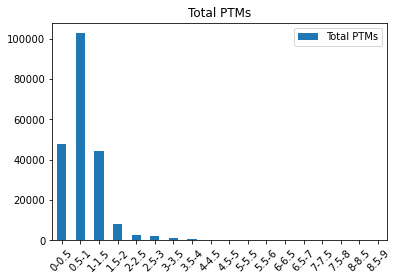

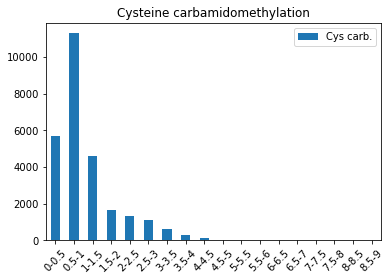

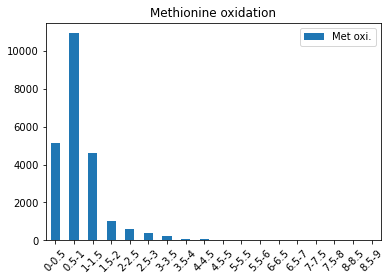

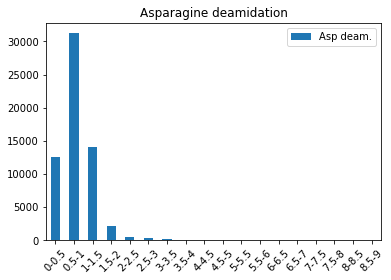

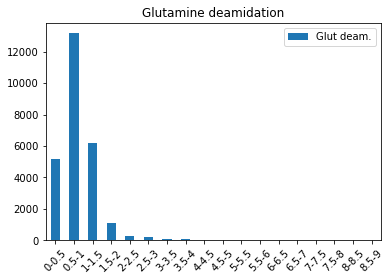

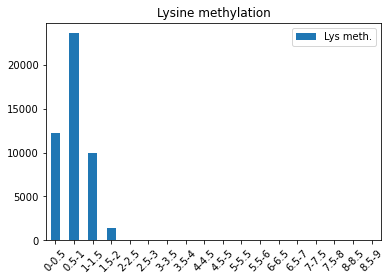

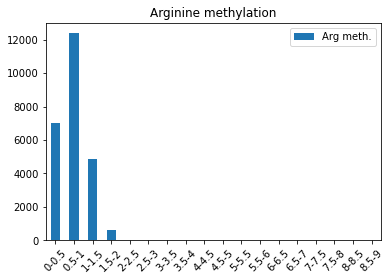

In [39]:
# making evenly spaced bins for the Xcorr data based on the min and max, called above
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5', '6.5-7', '7-7.5', '7.5-8', '8-8.5', '8.5-9']

# use pandas cut function to do the binning itself
comet['binned'] = pd.cut(comet['xcorr'], bins=bins, labels=labels)

# bar plots of binned PTM data

index = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5', '6.5-7', '7-7.5', '7.5-8', '8-8.5', '8.5-9']
data = {'Total PTMs': [comet.groupby('binned')['ptm-total'].sum()['0-0.5'], comet.groupby('binned')['ptm-total'].sum()['0.5-1'], comet.groupby('binned')['ptm-total'].sum()['1-1.5'], comet.groupby('binned')['ptm-total'].sum()['1.5-2'], comet.groupby('binned')['ptm-total'].sum()['2-2.5'], comet.groupby('binned')['ptm-total'].sum()['2.5-3'], comet.groupby('binned')['ptm-total'].sum()['3-3.5'], comet.groupby('binned')['ptm-total'].sum()['3.5-4'], comet.groupby('binned')['ptm-total'].sum()['4-4.5'], comet.groupby('binned')['ptm-total'].sum()['4.5-5'], comet.groupby('binned')['ptm-total'].sum()['5-5.5'], comet.groupby('binned')['ptm-total'].sum()['5.5-6'], comet.groupby('binned')['ptm-total'].sum()['6-6.5'], comet.groupby('binned')['ptm-total'].sum()['6.5-7'], comet.groupby('binned')['ptm-total'].sum()['7-7.5'], comet.groupby('binned')['ptm-total'].sum()['7.5-8'], comet.groupby('binned')['ptm-total'].sum()['8-8.5'], comet.groupby('binned')['ptm-total'].sum()['8.5-9']],
        'Cys carb.': [comet.groupby('binned')['c-carb'].sum()['0-0.5'], comet.groupby('binned')['c-carb'].sum()['0.5-1'], comet.groupby('binned')['c-carb'].sum()['1-1.5'], comet.groupby('binned')['c-carb'].sum()['1.5-2'], comet.groupby('binned')['c-carb'].sum()['2-2.5'], comet.groupby('binned')['c-carb'].sum()['2.5-3'], comet.groupby('binned')['c-carb'].sum()['3-3.5'], comet.groupby('binned')['c-carb'].sum()['3.5-4'], comet.groupby('binned')['c-carb'].sum()['4-4.5'], comet.groupby('binned')['c-carb'].sum()['4.5-5'], comet.groupby('binned')['c-carb'].sum()['5-5.5'], comet.groupby('binned')['c-carb'].sum()['5.5-6'], comet.groupby('binned')['c-carb'].sum()['6-6.5'], comet.groupby('binned')['c-carb'].sum()['6.5-7'], comet.groupby('binned')['c-carb'].sum()['7-7.5'], comet.groupby('binned')['c-carb'].sum()['7.5-8'], comet.groupby('binned')['c-carb'].sum()['8-8.5'], comet.groupby('binned')['c-carb'].sum()['8.5-9']],
        'Met oxi.': [comet.groupby('binned')['m-oxid'].sum()['0-0.5'], comet.groupby('binned')['m-oxid'].sum()['0.5-1'], comet.groupby('binned')['m-oxid'].sum()['1-1.5'], comet.groupby('binned')['m-oxid'].sum()['1.5-2'], comet.groupby('binned')['m-oxid'].sum()['2-2.5'], comet.groupby('binned')['m-oxid'].sum()['2.5-3'], comet.groupby('binned')['m-oxid'].sum()['3-3.5'], comet.groupby('binned')['m-oxid'].sum()['3.5-4'], comet.groupby('binned')['m-oxid'].sum()['4-4.5'], comet.groupby('binned')['m-oxid'].sum()['4.5-5'], comet.groupby('binned')['m-oxid'].sum()['5-5.5'], comet.groupby('binned')['m-oxid'].sum()['5.5-6'], comet.groupby('binned')['m-oxid'].sum()['6-6.5'], comet.groupby('binned')['m-oxid'].sum()['6.5-7'], comet.groupby('binned')['m-oxid'].sum()['7-7.5'], comet.groupby('binned')['m-oxid'].sum()['7.5-8'], comet.groupby('binned')['m-oxid'].sum()['8-8.5'], comet.groupby('binned')['m-oxid'].sum()['8.5-9']],
        'Asp deam.': [comet.groupby('binned')['n-deam'].sum()['0-0.5'], comet.groupby('binned')['n-deam'].sum()['0.5-1'], comet.groupby('binned')['n-deam'].sum()['1-1.5'], comet.groupby('binned')['n-deam'].sum()['1.5-2'], comet.groupby('binned')['n-deam'].sum()['2-2.5'], comet.groupby('binned')['n-deam'].sum()['2.5-3'], comet.groupby('binned')['n-deam'].sum()['3-3.5'], comet.groupby('binned')['n-deam'].sum()['3.5-4'], comet.groupby('binned')['n-deam'].sum()['4-4.5'], comet.groupby('binned')['n-deam'].sum()['4.5-5'], comet.groupby('binned')['n-deam'].sum()['5-5.5'], comet.groupby('binned')['n-deam'].sum()['5.5-6'], comet.groupby('binned')['n-deam'].sum()['6-6.5'], comet.groupby('binned')['n-deam'].sum()['6.5-7'], comet.groupby('binned')['n-deam'].sum()['7-7.5'], comet.groupby('binned')['n-deam'].sum()['7.5-8'], comet.groupby('binned')['n-deam'].sum()['8-8.5'], comet.groupby('binned')['n-deam'].sum()['8.5-9']],
        'Glut deam.': [comet.groupby('binned')['q-deam'].sum()['0-0.5'], comet.groupby('binned')['q-deam'].sum()['0.5-1'], comet.groupby('binned')['q-deam'].sum()['1-1.5'], comet.groupby('binned')['q-deam'].sum()['1.5-2'], comet.groupby('binned')['q-deam'].sum()['2-2.5'], comet.groupby('binned')['q-deam'].sum()['2.5-3'], comet.groupby('binned')['q-deam'].sum()['3-3.5'], comet.groupby('binned')['q-deam'].sum()['3.5-4'], comet.groupby('binned')['q-deam'].sum()['4-4.5'], comet.groupby('binned')['q-deam'].sum()['4.5-5'], comet.groupby('binned')['q-deam'].sum()['5-5.5'], comet.groupby('binned')['q-deam'].sum()['5.5-6'], comet.groupby('binned')['q-deam'].sum()['6-6.5'], comet.groupby('binned')['q-deam'].sum()['6.5-7'], comet.groupby('binned')['q-deam'].sum()['7-7.5'], comet.groupby('binned')['q-deam'].sum()['7.5-8'], comet.groupby('binned')['q-deam'].sum()['8-8.5'], comet.groupby('binned')['q-deam'].sum()['8.5-9']],
        #'Lys iron': [comet.groupby('binned')['k-iron'].sum()['0-0.5'], comet.groupby('binned')['k-iron'].sum()['0.5-1'], comet.groupby('binned')['k-iron'].sum()['1-1.5'], comet.groupby('binned')['k-iron'].sum()['1.5-2'], comet.groupby('binned')['k-iron'].sum()['2-2.5'], comet.groupby('binned')['k-iron'].sum()['2.5-3'], comet.groupby('binned')['k-iron'].sum()['3-3.5'], comet.groupby('binned')['k-iron'].sum()['3.5-4'], comet.groupby('binned')['k-iron'].sum()['4-4.5'], comet.groupby('binned')['k-iron'].sum()['4.5-5'], comet.groupby('binned')['k-iron'].sum()['5-5.5'], comet.groupby('binned')['k-iron'].sum()['5.5-6'], comet.groupby('binned')['k-iron'].sum()['6-6.5'], comet.groupby('binned')['k-iron'].sum()['6.5-7'], comet.groupby('binned')['k-iron'].sum()['7-7.5'], comet.groupby('binned')['k-iron'].sum()['7.5-8'], comet.groupby('binned')['k-iron'].sum()['8-8.5'], comet.groupby('binned')['k-iron'].sum()['8.5-9']],
        'Lys meth.': [comet.groupby('binned')['k-meth'].sum()['0-0.5'], comet.groupby('binned')['k-meth'].sum()['0.5-1'], comet.groupby('binned')['k-meth'].sum()['1-1.5'], comet.groupby('binned')['k-meth'].sum()['1.5-2'], comet.groupby('binned')['k-meth'].sum()['2-2.5'], comet.groupby('binned')['k-meth'].sum()['2.5-3'], comet.groupby('binned')['k-meth'].sum()['3-3.5'], comet.groupby('binned')['k-meth'].sum()['3.5-4'], comet.groupby('binned')['k-meth'].sum()['4-4.5'], comet.groupby('binned')['k-meth'].sum()['4.5-5'], comet.groupby('binned')['k-meth'].sum()['5-5.5'], comet.groupby('binned')['k-meth'].sum()['5.5-6'], comet.groupby('binned')['k-meth'].sum()['6-6.5'], comet.groupby('binned')['k-meth'].sum()['6.5-7'], comet.groupby('binned')['k-meth'].sum()['7-7.5'], comet.groupby('binned')['k-meth'].sum()['7.5-8'], comet.groupby('binned')['k-meth'].sum()['8-8.5'], comet.groupby('binned')['k-meth'].sum()['8.5-9']],
        'Arg meth.': [comet.groupby('binned')['r-meth'].sum()['0-0.5'], comet.groupby('binned')['r-meth'].sum()['0.5-1'], comet.groupby('binned')['r-meth'].sum()['1-1.5'], comet.groupby('binned')['r-meth'].sum()['1.5-2'], comet.groupby('binned')['r-meth'].sum()['2-2.5'], comet.groupby('binned')['r-meth'].sum()['2.5-3'], comet.groupby('binned')['r-meth'].sum()['3-3.5'], comet.groupby('binned')['r-meth'].sum()['3.5-4'], comet.groupby('binned')['r-meth'].sum()['4-4.5'], comet.groupby('binned')['r-meth'].sum()['4.5-5'], comet.groupby('binned')['r-meth'].sum()['5-5.5'], comet.groupby('binned')['r-meth'].sum()['5.5-6'], comet.groupby('binned')['r-meth'].sum()['6-6.5'], comet.groupby('binned')['r-meth'].sum()['6.5-7'], comet.groupby('binned')['r-meth'].sum()['7-7.5'], comet.groupby('binned')['r-meth'].sum()['7.5-8'], comet.groupby('binned')['r-meth'].sum()['8-8.5'], comet.groupby('binned')['r-meth'].sum()['8.5-9']]
        }

cometbin = pd.DataFrame(data, columns=['Total PTMs','Cys carb.','Met oxi.','Asp deam.', 'Glut deam.', 'Lys meth.', 'Arg meth.'], index=index)

ax1 = cometbin.plot.bar(y='Total PTMs', rot=45)
ax1.set_title('Total PTMs')

ax2 = cometbin.plot.bar(y='Cys carb.', rot=45)
ax2.set_title('Cysteine carbamidomethylation')

ax3 = cometbin.plot.bar(y='Met oxi.', rot=45)
ax3.set_title('Methionine oxidation')

ax4 = cometbin.plot.bar(y='Asp deam.', rot=45)
ax4.set_title('Asparagine deamidation')

ax5 = cometbin.plot.bar(y='Glut deam.', rot=45)
ax5.set_title('Glutamine deamidation')

ax6 = cometbin.plot.bar(y='Lys meth.', rot=45)
ax6.set_title('Lysine methylation')

ax7 = cometbin.plot.bar(y='Arg meth.', rot=45)
ax7.set_title('Arginine methylation')

#plt.savefig('/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/MED4_trypsin1_Comet_PTMopt.png')

<module 'matplotlib.pyplot' from '/home/millieginty/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

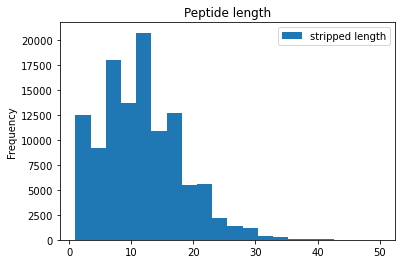

In [40]:
# histogram of stripped peptide lengths

#plt.rcdefaults()
#fig, ax = plt.subplots()

comet.plot(y='stripped length', kind = 'hist', bins = 20, title = 'Peptide length')
plt

<module 'matplotlib.pyplot' from '/home/millieginty/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

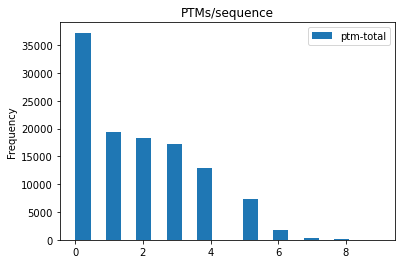

In [41]:
# histogram of total peptide amounts

#plt.rcdefaults()
#fig, ax = plt.subplots()

comet.plot(y='ptm-total', kind = 'hist', bins = 20, title = 'PTMs/sequence')
plt

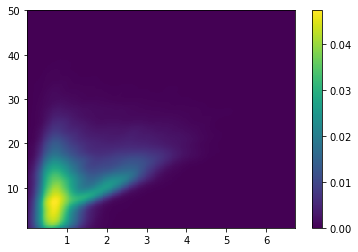

In [42]:
from matplotlib import pyplot
# density plot of xcorr vs length (idea from https://python-graph-gallery.com/85-density-plot-with-matplotlib/)

# read in data
x = comet['xcorr']
y = comet['stripped length']
 
# evaluate a gaussian kernel density estimation (KDE) on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.colorbar()
plt.show() 

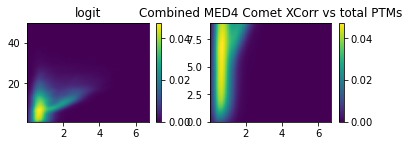

In [43]:
# plot with density of xcorr vs length and xcorr vs total ptms
plt.figure()

# read in data
x = comet['xcorr']
y = comet['stripped length']

a = comet['xcorr']
b = comet['ptm-total']

# evaluate a gaussian kernel density estimation (KDE) on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

c = kde.gaussian_kde([a,b])
ai, bi = np.mgrid[a.min():a.max():nbins*1j, b.min():b.max():nbins*1j]
di = k(np.vstack([ai.flatten(), bi.flatten()]))

# density plot of length vs xcorr
plt.subplot(221)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.title('logit')
plt.colorbar()

# density plot of xcorr vs ptms
plt.subplot(222)
plt.pcolormesh(ai, bi, di.reshape(ai.shape))
plt.title('Combined MED4 Comet XCorr vs total PTMs')
plt.colorbar()


plt.show()